In [2]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

<span style="color:hotpink; font-size: 30px; font-weight: bold;"> ch10.N차원 배열다루기 </span>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체 만들기 위한 라이브러리
- 2차원 배열은 행렬개념으로 사용할 수 있음
- numpy는 c언어로 구현됨(속도가 빠름-고성능 수치 계산 패키지)

# 1절. 넘파이 패키지
- 모양 바꾸기 : ex)3차원 배열을 1차원으로 바꿀 수 있음
- 배열 조작하기 : 행렬을 변경하여 행->열 , 열->행 조작할 수 있음
- 정렬하기 : argmax는 많이 사용함

## 1.1 배열저장

In [2]:
import numpy as np
np.__version__ #버전확인 ().__version__

'1.23.5'

In [11]:
# np.arage(from,stop,step) from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성함
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [19]:
from numpy import arange
a = arange(15).reshape(3,5)  #reshape:3행 5열로 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [21]:
#배열의 요소하나하나의 타입을 물어보는것
a.dtype #a배열 요소의 type / 정수는 기본 int32(32비트)로 형성 

dtype('int32')

In [20]:
#a 변수의 타입
type(a)

numpy.ndarray

In [22]:
a.itemsize #한 요소의 사이즈 (바이트 사이즈)

4

In [23]:
a.ndim   #차원수(축수)

2

In [24]:
a.size #배열 요소의 갯수

15

In [25]:
a.shape   #배열의 구조 (반드시 튜플로 return)

(3, 5)

## 1.2 배열의 구조 변경(구조, 타입)


In [28]:
#구조 변경
print('구조변경 전', a, sep='\n')
a.shape = (5,3) #구조변경 
print('구조변경 후',a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [37]:
#타입 변경 (x) 이렇게 하면 안되고 특정한 함수를 써야 함 
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
a.dtype #데이터를 읽어올 때 32바이트로

dtype('int32')

In [39]:
a[0,3]

3

In [40]:
a.itemsize

4

In [ ]:
#놓친거. 선생님꺼 불러오기
a. 

In [78]:
a.dtype = np.int64  #a배열을 읽을 때 62bit씩 읽는다
a.dtype

dtype('int64')

In [79]:
a.itemsize

8

In [80]:
a.size, a.shape

(6, (3, 2))

In [81]:
a 

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [90]:
#타입변경 방법(이렇게 해야함)
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [109]:
a = a.astype(np.int64) #결과를 받아서 'a'를 바꾸지않음. a를 바꾸려면 다시 할당해야함.
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [110]:
a.dtype

dtype('int64')

In [111]:
a.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [112]:
a.dtype

dtype('int64')

In [113]:
a.itemsize

8

In [114]:
a.size, a.shape

(12, (3, 4))

In [115]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [116]:
a.flatten()  #1차원으로 바꾸는 방법

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [117]:
a.ravel() #1차원으로 바꾸는 방법

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- 배열저장 pkl,npy
- 딥러닝모델 저장 h5,keras
- 머신러닝 모델 저장 pkl,joblib

In [118]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [119]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a,f)

In [120]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [121]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [122]:
a == load_a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [125]:
np.all(a == load_a) #a 넘파이배열과  load_a 넘파이 배열이 같은지 확인하는 np.all 
#용량이 작은 넘파이일경우 진행, 큰 파일이면 아래서식으로 실행

True

In [127]:
np.save('data/ch10_a.npy', a)

In [129]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

True

# 2절. 넘파이 배열
- array()함수를 이용한 다른 백터 데이터(파이썬 데이터) 구조를 배열로 변환
- arange(), ones(), zeros(), empty() 기본값이 있는 함수들
- 랜덤값을 가지는 함수들 ...
---
- zeros()는 이미지로 바꿀때 많이 씀. 

## 2.1 array()함수로 넘파이 배열 생성
np.array(obj, dtype, copy=T/F)         

*obj에는 리스트나 튜플
*여기에서 dtype은 지정가능, 지정 안하면 list타입대로 따라감.

In [130]:
a = np.array([2, 4, 6]) #정수의 기본타입은 int32 / 
a

array([2, 4, 6])

In [131]:
a = np.array([2., 4, 6]) #.이들어가면 실수로 통일되어 출력 / 실수의 기본 타입은 float64  
a

array([2., 4., 6.])

In [132]:
a = np.array(['2', 4, 6])  # 1개라도 문자가 들어가면 문자로 통일되어 출력 / 문자는 타입이 없음 
a

array(['2', '4', '6'], dtype='<U11')

In [134]:
a = np.array([2, 4, 6], dtype=np.int8)
a

array([2, 4, 6], dtype=int8)

In [136]:
a[1], a[0], a[2] #인덱스로 추출이 가능 (for문으로도 가능)

(4, 2, 6)

In [137]:
a.dtype

dtype('int8')

In [139]:
#2차원 배열 만들기
b = np.array([[1.3,2.4],
              [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [140]:
b.dtype

dtype('float64')

In [142]:
b = np.array([[1.3,2.4],[4,5]],dtype=np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [143]:
b.itemsize

4

In [144]:
b.astype(np.float64)  #astype= 타입변경

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [145]:
l = [[1,2], [3.4,4.5]]
for row in l:
    print(row)

[1, 2]
[3.4, 4.5]


In [146]:
l = [[1,2], [3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [147]:
#배열로 만들기 
c = np.array([[1,2], [3.4,4.5]], dtype=np.float16)
c

array([[1. , 2. ],
       [3.4, 4.5]], dtype=float16)

In [161]:
#enumerate를 써서 나누기
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{:^3}행 {:^3}열 :{:^10}".format(i,j,item), end='\t')
    print()

 0 행  0 열 :   1.0    	 0 행  1 열 :   2.0    	
 1 행  0 열 :3.400390625	 1 행  1 열 :   4.5    	


In [162]:
c = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [187]:
c[0,:1],c[1,1:2],c[1,3:4]

(array([1], dtype=int16), array([7], dtype=int16), array([9], dtype=int16))

In [163]:
c[0][3] #리스트에서는 이렇게 했으나 배열에서는 안됨

4

In [164]:
c[0,3] #배열에서 원하는 숫자 추출 하는 방법

4

In [174]:
c[::,1:3] #슬라이싱은 배열에서도 데이터프레임에서도 가능

array([[2, 3],
       [7, 8]], dtype=int16)

In [173]:
c[0,2:5]

array([3, 4, 5], dtype=int16)

In [181]:
c[1,1:3]

array([7, 8], dtype=int16)

In [180]:
#모든 행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [182]:
#모든 행의 맨 마지막 열을 제외한 추출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [193]:
# copy 넌 무엇이냐 copy의 기본값은 True
c = np.array([[1, 2],[3, 4]])
d = np.array(c, copy=False)   #d=c (복제본을 만들지 않겠다) 
print('c =', c, sep='\n')
print('d =', d, sep='\n')
d[1,0] = 3333
print('c =', c, sep='\n')
print('d =', d, sep='\n')
print('c주소:{}, d주소: {}'.format(id(c),id(d)))

c =
[[1 2]
 [3 4]]
d =
[[1 2]
 [3 4]]
c =
[[   1    2]
 [3333    4]]
d =
[[   1    2]
 [3333    4]]
c주소:2057121886832, d주소: 2057121886832


In [194]:
# copy 넌 무엇이냐 copy의 기본값은 True
c = np.array([[1, 2],[3, 4]])
d = np.array(c, copy=True)   #깊은 복사 d=c.copy() 
print('c =', c, sep='\n')
print('d =', d, sep='\n')
d[1,0] = 3333
print('c =', c, sep='\n')
print('d =', d, sep='\n')
print('c주소:{}, d주소: {}'.format(id(c),id(d)))

c =
[[1 2]
 [3 4]]
d =
[[1 2]
 [3 4]]
c =
[[1 2]
 [3 4]]
d =
[[   1    2]
 [3333    4]]
c주소:2057121886640, d주소: 2057121888656


## 2.2 기본 값이 있는 배열생성
```
- np.zeros((튜플))        : 요소들이 다 0로 채워짐 
- np.ones((튜플))         : 요소들이 다 1로 채워짐
- np.full((튜플), 기본값) : 요소들이 다 기본값
- np.empty((튜플))        : 요소들이 임의의 값(메모리 상태에 따라 달라짐) 
※위의 함수를 이용해서 생성된 배열은 기본 dtype이 np.float64로 설정, 다른 거로 지정가능


In [196]:
np.zeros((3,5)) #기본 float64로 잡힘

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [201]:
x = np.ones((3,5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [207]:
np.full((3,8),24)

array([[24, 24, 24, 24, 24, 24, 24, 24],
       [24, 24, 24, 24, 24, 24, 24, 24],
       [24, 24, 24, 24, 24, 24, 24, 24]])

In [205]:
np.empty((2,5))

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306,
        1.29061074e-306, 1.89146896e-307],
       [7.56571288e-307, 3.11525958e-307, 1.24610723e-306,
        1.29061142e-306, 5.53353523e-322]])

## 2.3 랜덤값을 갖는 배열 생성
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값을 만든다.
- np.random.uniform(low=0,high =1.0,size=tup) : low부터 high미만의 균등분표를 갖는 랜덤값
- np.random.normal(loc=0,scale=1.0,size=tup) : 평균loc과 표준편차를 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균 0, 표준편차 1인 정규분포)의 1차원 난수 배열 발생 (난수 n개) \
tup는 튜플임 \

**<아래 random은 배열을 발생하는 건 아님>** \
*random.randint(n) : 0부터 n미만의 정수 난수 1개 발생 \
*0<= 난수 <1\
*scale은 표준편차

씨본은 지도시각화 안 됨.

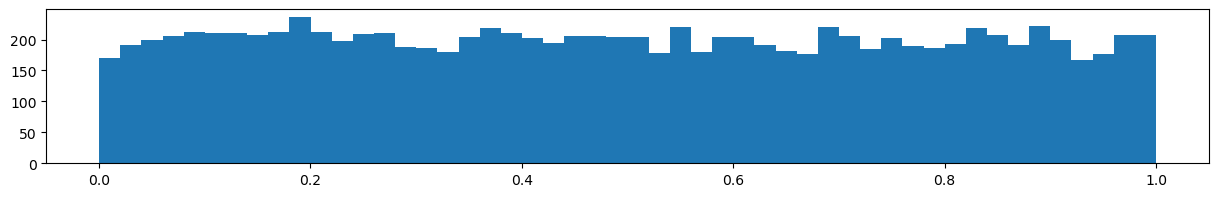

In [230]:
#균등분포
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) #그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=50)  #bins =구간설정
plt.show()

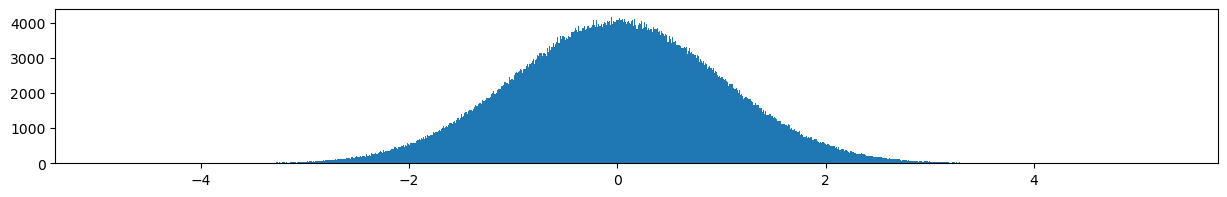

In [233]:
#표준정규분포
x = np.random.randn(1000000)
plt.figure(figsize=(15,2)) #그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=1000)  #bins =구간설정
plt.show()

In [234]:
#2차원 난수 배열
np.random.seed(12) #씨드값을 맞추면 발생되는 난수의 순서가 동일해짐
np.random.random((2,5)) #0부터 1미만의 균등분포를 갖는 랜덤값 / 실행할때마다 값이 다름

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [235]:
#최대값, 최소값 지정하여 균등분포 난수 배열(실수)
np.random.uniform(-1, 10, (2, 5)) #-1부터 10미만의 균등 분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [236]:
#평균loc과 표준편차를 갖는 정규분포 랜덤값
np.random.normal(10, 2, (2, 5))  #평균 10, 표준편차 2인 정규분포 난수 배열 

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 생성
- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열로 생성 (float로 만들어짐)

In [237]:
np.linspace(0, 2, 20) #동일한 간격으로 20개를 생성

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [250]:
#linspace를 많은 수의 점들을 생성할때 유용(사인곡선)
x = np.linspace(0,2*np.pi, 10000)
y = np.sin(x)

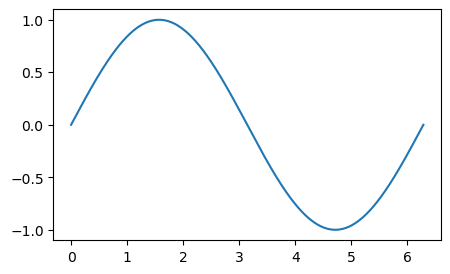

In [253]:
#점그래프(plot)
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.show()

In [254]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [255]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수,] 행수, 열수) 3차원 (행수,열수) 2차원 (열수) 1차원 / -1이 올 수 있음, reshape는 (-1)이 가장많이 쓰여짐 
- resize([면수,]행수,열수) : -1 불가 
- T : 전치행렬(행과 열을 바꾸는 방법)로 변환  
- transpose():전치행렬로 변환
※ 실행 결과가 출력되면 배열이 수정되지 않고, 실행 결과가 없으면 배열 수정됨

In [5]:
a = np.random.random((2,3))
a

array([[0.61015717, 0.94928032, 0.03657965],
       [0.28477106, 0.7123479 , 0.54711591]])

In [6]:
 #리스트와 다르게 10번 반복이 아닌 요소별로 10이 곱해진다. (연산) 
#round : 반올림 / flor:내림 / cell:올림 

In [7]:
a = np.round(a*10)
a

array([[6., 9., 0.],
       [3., 7., 5.]])

In [10]:
a = a.reshape(3,2)
a

array([[1., 6.],
       [9., 6.],
       [5., 1.]])

In [11]:
a.reshape(2, -1)  #-1이 주어지면 해당 차원의 크기가 자동 계산

array([[1., 6., 9.],
       [6., 5., 1.]])

In [8]:
a.reshape(2, -1)

array([[6., 9., 0.],
       [3., 7., 5.]])

In [10]:
a.reshape(-1, 2) 

array([[6., 9.],
       [0., 3.],
       [7., 5.]])

In [15]:
a.resize((2,3))   #결과를 안 뿌려줌..a가 바뀜  / 결과를 출력하지 않는 함수는 배열을 바꿈 (-1이 불가)

In [16]:
a

array([[1., 6., 9.],
       [6., 5., 1.]])

In [3]:
import numpy as np

In [11]:
a. ravel(), a.flatten() #1차원으로 변경

(array([6., 9., 0., 3., 7., 5.]), array([6., 9., 0., 3., 7., 5.]))

In [12]:
a

array([[6., 9., 0.],
       [3., 7., 5.]])

In [13]:
a.T #전치행렬(행과 열을 뒤바꾼 행렬) / a를 바꾸진 않음

array([[6., 3.],
       [9., 7.],
       [0., 5.]])

In [16]:
a.transpose() #전치 행열 / a를 바꾸진 않음

array([[6., 3.],
       [9., 7.],
       [0., 5.]])

In [17]:
a

array([[6., 9., 0.],
       [3., 7., 5.]])

## 2.6 배열 인쇄

In [18]:
#배열이 커서 출력이 안 될 경우
np.arange(1001) #1000개 까지는 출력이 가능하나 그 이후는 출력이 안 됨.

array([   0,    1,    2, ...,  998,  999, 1000])

In [21]:
np.arange(20000).reshape(200,100)

array([[    0,     1,     2, ...,    97,    98,    99],
       [  100,   101,   102, ...,   197,   198,   199],
       [  200,   201,   202, ...,   297,   298,   299],
       ...,
       [19700, 19701, 19702, ..., 19797, 19798, 19799],
       [19800, 19801, 19802, ..., 19897, 19898, 19899],
       [19900, 19901, 19902, ..., 19997, 19998, 19999]])

In [22]:
#배열 출력 옵션 변경 (기본 출력이 1000개, 인쇄할 사이즈를 10000, 최대치, 무한대)
#무한대 - 임의의 값에 저장 
#최대치 - sys.maxsize

#출력값을 만개로 바꾼것
import sys
# np.set_printoptions(threshold=10000)
#출력값을 최대값으로 바꾼것
# np.set_printoptions(threshold=sys.maxsize)
#무한대로 바꾼것 
np.set_printoptions(threshold=np.inf)
#커널 재시작시 threshold값 1000으로 복귀

In [23]:
sys.maxsize

9223372036854775807

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [27]:
# 리스트는 더함
l = [1, 2, 3]
m = [4, 5, 6]
l + m

[1, 2, 3, 4, 5, 6]

In [30]:
a = np.array([10,20,30,40], dtype=np.int8)
b = np.arange(4)
print(a, 'a의 타입 :', a.dtype)
print(b, 'b의 타입 :' ,b.dtype)

[10 20 30 40] a의 타입 : int8
[0 1 2 3] b의 타입 : int32


In [37]:
a+b

array([10, 21, 32, 43])

In [39]:
c = a + b
c , c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [40]:
a += b #a = a+b
a

array([10, 21, 32, 43], dtype=int8)

In [41]:
a = a + b
a, a.dtype

(array([10, 22, 34, 46]), dtype('int32'))

In [46]:
a**b

array([    1,    22,  1156, 97336])

In [50]:
a<20


array([ True, False, False, False])

In [54]:
#배열에서 특정한 성질의 요소만 추출하는 방식
a[[True, True, True, False]]

array([10, 22, 34])

In [63]:
print(a[a<30])

[10 22]


In [65]:
print(a)
print(b)
a*b

[10 22 34 46]
[0 1 2 3]


array([  0,  22,  68, 138])

### 2)행렬(2차원 배열)의 곱 (@, dot함수) 
cf*(요소별 곱)이랑 @랑은 다름

In [76]:
a = np.array([[1, 2],
             [0, 1]])
b = np.array([[2, 0],
              [3, 4]])

print('a =', a, sep='\n')
print('b =', b, sep='\n')

a =
[[1 2]
 [0 1]]
b =
[[2 0]
 [3 4]]


In [77]:
#요소별 계산
a*b

array([[2, 0],
       [0, 4]])

In [78]:
#
a@b

array([[8, 8],
       [3, 4]])

In [80]:
print('요소별 곱 a*b =', a*b, sep='\n')
print('행렬곱 a@b =', a@b, sep='\n')
print('행렬곱 a.dot(b) =', a.dot(b), sep='\n')

요소별 곱 a*b =
[[2 0]
 [0 4]]
행렬곱 a@b =
[[8 8]
 [3 4]]
행렬곱 a.dot(b) =
[[8 8]
 [3 4]]


In [ ]:
# 단위행렬 np.exe
# 곱셈을 하려면 앞의 열수랑 뒤의 행수가 같아야 함. 2*3 , 3*2 = 2*2 (결과값은 2,2로 나옴)
# 정방행렬

In [83]:
#2행 2열의 단위행렬 (정방행렬:np.eye(n)) / 정방행렬이 아니면 단위행렬을 구할 수 없음 
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 3) 복합 대입연산자 사용
- 배열에서는 a=a+b와 a+=b 다소 다르게 작동
- a+=b는 오류가 날 수 있어서 a=a+b를 많이 쓴다.

In [86]:
a = np.ones((2,3), dtype=int) #int 32까지 2행 3열 배열 (4비트)
a

array([[1, 1, 1],
       [1, 1, 1]])

In [90]:
b = np.random.random((2,3)) #float64 2행 3열 배열 (8비트)
b

array([[0.85602458, 0.87239653, 0.29829942],
       [0.12400808, 0.0689227 , 0.5998506 ]])

In [94]:
#a+b를 기존 a에 넣는다. 
a += b 
#8비트는 4비트에 들어가지못해 오류가 난다. 

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [96]:
a = a+b #a+b는 새로운 a변수로 만드는거라서 오류가 안 남 
a

array([[6.71204916, 6.74479306, 5.59659883],
       [5.24801617, 5.13784539, 6.19970121]])

In [93]:
b += a
b

array([[2.85602458, 2.87239653, 2.29829942],
       [2.12400808, 2.0689227 , 2.5998506 ]])

### 4) 배열 요소별 집계
- sum, min, max, <font color='red'>**mean(평균), var(분산), std(표준편차)**</font>

In [99]:
a = np.array([[2, 2, 2, 3],
              [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [111]:
print('전체합 :', np.sum(a), a.sum())
print('최소값 :', np.min(a),a.min())
print('최대값 :', np.max(a), a.max())
print('전체 평균 :', np.mean(a), a.mean())
print('전체 분산 :', np.var(a), a.var())
print('전체 표준편차 :', np.std(a), a.std())

전체합 : 19 19
최소값 : 1 1
최대값 : 4 4
전체 평균 : 2.375 2.375
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


### 4) 배열 축별 집계
- sum, min, max, <font color='purple'>**mean(평균), var(분산), std(표준편차)**</font>, <font color='red' font-size =15pt> ***argmax(최대값이 있는 인덱스)***</font> \
argmax 인덱스를 통한 최대값을 찾기

In [112]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [115]:
#행별 합계 
#axis=1: 1축(열)들의 합 (0축-행은 고정)
print('a의 행별 합 :', a.sum(axis=1), np.sum(a, axis=1)) 

#2차원에서 axis= 0(행축) 또는 1(열축)
#3차원에서 axis= 0(면축),1(행축),2(열축) / 3차원 배열[면,행,열]

a의 행별 합 : [ 9 10] [ 9 10]


In [116]:
#열별 합계
#axis=0 : 0축들의 합 (1축-열은 고정)
print('a의 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 : [6 5 4 4] [6 5 4 4]


In [117]:
print('a의 행별 최대값 위치 :', a.argmax(axis=1), np.argmax(a, axis=1))

a의 행별 최대값 위치 : [3 0] [3 0]


In [120]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2, 3, 4) #2면 3행 4열
b, b.ndim                #n.ndim(차원물어보는)

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [122]:
# 3차원일때 면축들의 합
# axis=0 :1축과 2축 고정하고 0축(0면,1면)들의 합
b.sum(axis=0), np.sum(b,axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [126]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [124]:
#axis=1 : 0축과 2축 고정하고 1축(0행,1행,2행)들의 합
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [127]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [125]:
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그외  요소별 계산하는 범용함수들
- 메모리나 시간을 효율적으로 사용할 수 있음 
- np.add(A, B, C) : C=np.add(A, B) : C=A+B 
- np.subtract(A, B, C) : C=np.subtract(A, B) : C=A-B
- np.multiply(A, B, C) : C=np.multiply(A, B) : C=A*B
- np.sqrt(배열) : 요소별 제곱근 cf. math.sqrt(스칼라값)

In [128]:
%time
a = np.array([1, 2])
b = np.array([3, 4])
c = a + b 

CPU times: total: 0 ns
Wall time: 0 ns


In [129]:
np.add(a,b,c)
c

array([4, 6])

In [130]:
c = np.add(a,b)
c

array([4, 6])

In [131]:
#np.sqrt(배열 또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [133]:
#스칼라값이 아니라는 오류 발생 
import math
math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 캐스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [135]:
# 1차원 배열 (배열x스칼라값)
a = np.array([1, 2, 3])
b = 10
print('a+b의 값 :', a + b)
print('a+b의 값 :', np.add(a,b))

a+b의 값 : [11 12 13]
a+b의 값 : [11 12 13]


In [136]:
# 브로드 캐스팅
# 1차원 배열 (배열x배열)
a = np.array([1, 2, 3])
b = np.array([10])
print('a+b의 값 :', a + b)
print('a+b의 값 :', np.add(a,b))

a+b의 값 : [11 12 13]
a+b의 값 : [11 12 13]


In [141]:
# 2차원 배열의 브로드 캐스팅
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]]) #4행 3열
b = np.array([1, 2, 3]) #3열
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [142]:
# 2차원 배열의 브로드 캐스팅
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]]) #4행 3열
b = np.array([[1],
              [2],
              [3],
              [4]]) #4행 1열 
a + b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [147]:
# 2차원 배열의 브로드 캐스팅
b = np.array([1,2,3,4])
# b_1 = b.reshape(4,1)             방법1
b_1 = b[:,np.newaxis]             #방법2 (많이 쓰는것)
# b_1 = np.expand_dims(b, axis=1)  방법3
b_1

array([[1],
       [2],
       [3],
       [4]])

In [148]:
a + b[:,np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [149]:
# a와 b의 모든 쌍의 조합에 대해 계산하는 방식
a = np.array([2, 3, 4, 5])
b = np.array([10, 20, 30, 40])

a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [150]:
a[:,np.newaxis] + b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [154]:
np.ix_(a,b) #ix_ = 증강 

(array([[2],
        [3],
        [4],
        [5]]),
 array([[10, 20, 30, 40]]))

In [153]:
ax, bx = np.ix_(a,b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기/분리하기
- 슬라이싱
- 두 배열을 합치는 함수
- r_, c_
- 두 배열을 문리하는 함수

## 3.1 인덱싱과 슬라이싱
- 인덱싱에는 없는 인덱스 쓰면 에러 발생 
- 슬라이싱에는 없는 인덱스 사용시 끝까지 실행.
- 음수 인덱스는 끝에서부터 실행

In [157]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [158]:
a[1:3,1:3] #1:3행 , 1:3열

array([[ 5,  6],
       [ 9, 10]])

In [164]:
a[:5,:3]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [166]:
a[:,0:-1]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [168]:
# 모든 행의 마지막 열 앞까지 (모든 행=모든 0축의 경우 :나 ...으로 씀)
a[...,:-1] 

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [174]:
# 0~1행까지 모든열 추출 (모든열(1축)의 경우 생략 가능:, ... 사용 가능)
a[0:2,:], a[:2,...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[16, 17, 18, 19]]))

In [175]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [176]:
a[1:3,-1]

array([ 7, 11])

In [179]:
#마지막행의 데이터를 2차원으로 변경 (4행,1열)
a_x = a[-1]
a_x.reshape(4,1)

array([[16],
       [17],
       [18],
       [19]])

In [181]:
a_x[:,np.newaxis]

array([[16],
       [17],
       [18],
       [19]])

In [188]:
a[-1][:,np.newaxis],a[-1].reshape(4,1),np.expand_dims(a[-1], axis=1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2 두 배열을 합치는 함수
**- vstack(tup) : 아래로 (수직으로/행으로) 추가하는 방식** \
**- hstack(tup) : 옆으로 (수평으로/열으로) 추가하는 방식** \
**- dstack(tup) : 마지막 출(열)을 쌓아 합침(차원 증가)**

In [200]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
v = np.vstack((a,b))
print('vstack 아래로 합치기 :', v, v.shape, sep='\n')
v = np.hstack((a,b))
print('hstack 옆으로 합치기 :', v, v.shape, sep='\n')
v = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', v, v.shape, sep='\n')

vstack 아래로 합치기 :
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [201]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
v = np.vstack((a,b))
print('vstack 아래로 합치기 :', v, sep='\n')
v = np.hstack((a,b))
print('hstack 옆으로 합치기 :', v, sep='\n')
v = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', v, sep='\n')

vstack 아래로 합치기 :
[[1 2 3]
 [4 5 6]]
hstack 옆으로 합치기 :
[1 2 3 4 5 6]
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]


In [208]:
#2차원 만들기
c = np.arange(24).reshape(2, 3, 4)
a,b = c[0], c[1]
print('a :',a, sep='\n')
print('b :', b,sep='\n')

a :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b :
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [209]:
v = np.vstack((a,b))
print('vstack 아래로 합치기 :', v, v.shape, sep='\n')
v = np.hstack((a,b))
print('hstack 옆으로 합치기 :', v, v.shape, sep='\n')
v = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', v, v.shape, sep='\n')

vstack 아래로 합치기 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기 :
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기 :
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [210]:
np.concatenate((a,b), axis=0) #0축으로 행을 열로 합해라. #vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [211]:
np.concatenate((a,b), axis=1 #0축으로 열을 행으로 합해라. #hstack((a,b))) 

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

<font color =red> <strong>
**- colunm_stack(tup) : 열단위로 합침**\
**- row_stack(tup) : 행단위로 합침 == vstack(tup)** \
**- stack(tup, axis) : axis속성에 따라 배열합침 axis음수차원 가능**</strong></font> 


In [212]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
np.column_stack((a, b, c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [213]:
np.row_stack((a, b, c))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [214]:
c = np.arange(24).reshape(2, 3, 4)
a,b = c[0], c[1]
print('a :',a, sep='\n')
print('b :', b,sep='\n')

a :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b :
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [215]:
np.stack((a,b), axis=0) #0면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [216]:
np.stack((a,b), axis=1) #행(1축)끼리 합쳐서 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [217]:
np.stack((a,b), axis=2)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_[]와 c_[]로 배열 합치기

In [218]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 5, 5, 5])
c = np.array([6, 6, 6, 6])
np.r_[a,b,c]  #한 행으로 합쳐짐

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [219]:
np.r_[c,a,b]

array([6, 6, 6, 6, 1, 2, 3, 4, 5, 5, 5, 5])

In [220]:
np.r_[[a],[b],[c]]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [221]:
np.c_[a,b,c] #컬럼 단위로 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하기
<font color='red'>**- vsplit(ary, 정수(몇개)나 벡터(몇번 인덱스)) : 첫번째 축을 따라 분할** \
**- hsplit(ary, 정수(몇개)나 벡터(몇번 인덱스)) : 두번째 축을 따라 분할**\
**- dsplit(ary, 정수나 벡터) : depth따라 나눔(3차원 이상에서만 동작)** 

    - 정수 n : n개 분리
    -[n]: n번째 인덱스를 기점으로 분리
    -[m,n] : m번째, n번째 인덱스를 기점으로 분리

In [222]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [227]:
a_vsplit = np.vsplit(a,3) #2개,4개로 분리는 에러 발생
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [231]:
np.vsplit(a,[2]) #2번 인덱스를 기점으로 분리, 차원이 축소되진 않음.

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [230]:
np.vsplit(a,[1])

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [241]:
np.hsplit(a,4)

[array([[0],
        [4],
        [8]]),
 array([[1],
        [5],
        [9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

In [242]:
np.hsplit(a,[2,3]) #[2,3] : 분리될 기준 인덱스

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

<font color='red'> **- split(ary, 갯수나 인덱스벡터, axis)** \
    - axis=0 : vsplit() 동일 \
    - axis=1 : hsplit() 동일 \
    - axis=2 : 3차원 이상에서만 동작 dsplit()동일 \
**- array_split(ary, 갯수나 인덱스벡터, axis)** \
    - split과 차이점은 나눠지지 않은 정수로도 사용 가능</font>

In [243]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [244]:
np.split(a, 2, axis=0)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [245]:
np.split(a, 2, axis=1)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [247]:
np.split(a, [2], axis=1)

[array([[ 0,  1],
        [10, 11]]),
 array([[ 2,  3,  4,  5,  6,  7,  8,  9],
        [12, 13, 14, 15, 16, 17, 18, 19]])]

In [250]:
# np.split(a, 3, axis=1) #에러 발생
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]